## Prédire si un patient est atteint ou non d'une maladie cardio vasculaie
---

Projet réalisé dans le but d'apprendre à manipuler la régression logistique et d'écrire ma propre classe dédiée à la manipulation de la régression logistique. Le modèle et les données qui en découlent sont calculés avec statsmodels.

Source des données : https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754128-decouvrez-le-jeu-de-donnees-des-maladies-cardio-vasculaires

Mon package contenant ma classe LogReg: https://github.com/nicodesh/ModelStats

A propos de la régression logistique :

- Régression logistique appliquée à un cas d'ophtalmologie https://www.em-consulte.com/en/article/842576
- Coube ROC : https://www.em-consulte.com/rmr/article/144229
- Régression logistique en Python (sklearn / statsmodels) : https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- Présentation universitaire par deux étudiantes sur la régression logistique : https://perso.univ-rennes1.fr/valerie.monbet/ExposesM2/2013/La%20re%CC%81gression%20logistique.pdf

## Import des librairies et de ma classe LogReg

In [1]:
import pandas as pd
import numpy as np

from modelstats import LogReg

## Import des données et affichage du jeu de données

In [2]:
df = pd.read_csv("data/maladies-cardio-vasculaires.txt", sep=";")
df.drop('ind', axis=1, inplace=True)
df['famhist'] = df['famhist'].apply(lambda x: 1 if x == 'Present' else 0)
df.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0
6,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0
7,114,4.08,4.59,14.60,1,62,23.11,6.72,58,1
8,114,0.00,3.83,19.40,1,49,24.86,2.49,29,0
9,132,0.00,5.80,30.96,1,69,30.11,0.00,53,1


## Définitions

- sbp : tension artérielle systolique
- tobacco : tabac cumulé (en kg)
- ldl : cholestérol de lipoprotéines de faible densité
- adiposity : adiposité
- famhist : antécédents familiaux
- typea : comportement type A
- obesity : obésité
- alcohol : consommation courante d'alcool
- age : âge au moment de l'attaque cardiaque
- chd : maladie coronarienne.

## Préparation de la donnée

In [3]:
lr1_data = df[['age', 'chd']].copy()

## Création de l'instance de régression logistique

In [4]:
lr1 = LogReg(lr1_data, threshold=0.5, the_class=10)

## Plot des points, de la probabilité par classe et de la régression

Ceci est bien entendu possible uniquement dans le cas d'une régression logistique simple. Ma classe s'occupe de tout, elle a seulement besoin de connaître la taille de chaque classe (ici 10 unités).

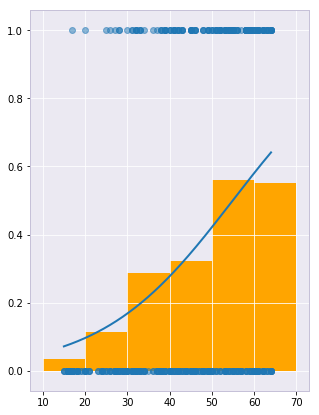

In [5]:
lr1.plot()

## Informations principales

In [6]:
lr1.infos()
lr1.model.summary()

2 parameters (including the intercept)


,Coeff,OR,P-Value
B1,-3.521710,0.029549,2.561215e-17
B2,0.064108,1.066208,5.757918e-14


Matrice de confusion:


,y = 1,y = 0,Total
Predict 1,71,59,130
Predict 0,89,243,332
Total,160,302,462



Success rate: 67.97%
Sensibility: 44.38%
Specificity: 80.46%


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Mar 2019   Pseudo R-squ.:                  0.1183
Time:                        18:57:18   Log-Likelihood:                -262.78
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 4.496e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5217      0.416     -8.465      0.000      -4.337      -2.706
x1             0.0641      0.009      7.513      0.000       0.047       0.081
==============================================================================
"""

## Courbe de ROC (Receiver Operating Characteristic)

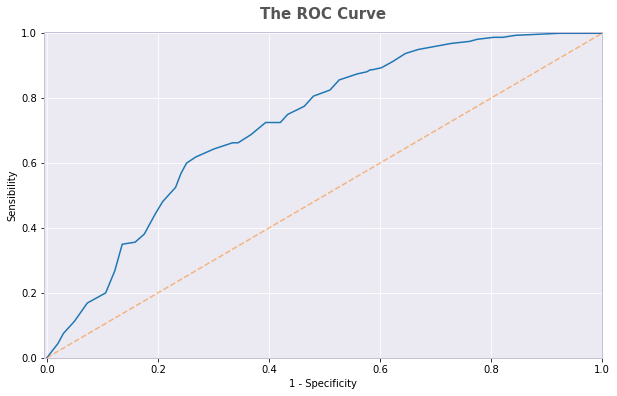

In [7]:
lr1.roc(tests=100)

## Régression logistique multiple

### Données

In [8]:
lr2_data = df.copy()
display(lr2_data.head())

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


### Régression logistique

In [9]:
lr2 = LogReg(lr2_data, threshold=0.5)
lr2.infos()
lr2.model.summary()

10 parameters (including the intercept)


,Coeff,OR,P-Value
B1,-6.150721,0.002132,0.000003
B2,0.006504,1.006525,0.256374
B3,0.079376,1.082612,0.002847
B4,0.173924,1.189965,0.003555
B5,0.018587,1.018760,0.525700
B6,0.925370,2.522803,0.000049
B7,0.039595,1.040389,0.001310
B8,-0.062910,0.939028,0.155095
B9,0.000122,1.000122,0.978350
B10,0.045225,1.046264,0.000193


Matrice de confusion:


,y = 1,y = 0,Total
Predict 1,83,46,129
Predict 0,77,256,333
Total,160,302,462



Success rate: 73.38%
Sensibility: 51.88%
Specificity: 84.77%


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Sat, 02 Mar 2019   Pseudo R-squ.:                  0.2080
Time:                        18:57:20   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 2.055e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1507      1.308     -4.701      0.000      -8.715      -3.587
x1             0.0065      0.006      1.135      0.256      -0.005       0.018
x2             0.0794      0.027      2.984      0.003       0.027       0.132
x3             0.1739      0.060      2.915      0.004       0.057       0.291
x4             0.0186      0.029      0.635      0.526      -0.039       0.076
x5             0.9254      0.228      4.061      0.000       0.479       1.372
x6             0.0396      0.012      3.214      0.001       0.015       0.064
x7            -0.0629      0.044     -1.422      0.155      -0.150       0.024
x8             0.0001      0.004      0.027      0.978      -0.009       0.009
x9             0.0452      0.012      3.728      0.000       0.021       0.069
==============================================================================
"""

### Courbe de ROC

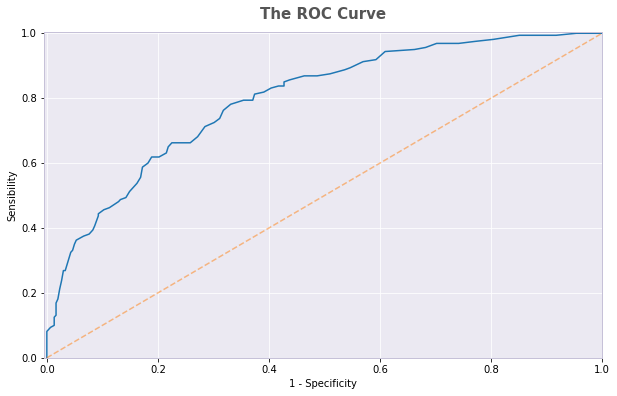

In [10]:
lr2.roc(tests=100)

## Algorithme de sélection - Backward elimination

Algorithme de sélection : backward elimination. Basé sur la pvalue de chaque variable.

In [11]:
pvalue = 0.05
good = False

while not good:
    max_pvalue = lr2.model.pvalues.max()
    
    # If the max pvalue is still > pvalue
    if (max_pvalue > pvalue):
        
        # Variable number minus 1 (the intercept) so we get the column number
        n_col = lr2.model.pvalues.reset_index(drop=True).idxmax() - 1
        
        # We get the column name from the column number
        name_column = lr2_data.columns[n_col]
        
        # We remove this column
        lr2_data.drop(name_column, axis=1, inplace=True)
        
        # Let's do it again!
        lr2 = LogReg(lr2_data, threshold=0.5)
    
    # We're done!
    else:
        good = True

display(lr2_data.columns)
lr2.infos()
lr2.model.summary()

Index(['tobacco', 'ldl', 'famhist', 'typea', 'age', 'chd'], dtype='object')

6 parameters (including the intercept)


,Coeff,OR,P-Value
B1,-6.446445,0.001586,2.552836e-12
B2,0.080375,1.083694,1.898095e-03
B3,0.161992,1.175850,3.209075e-03
B4,0.908175,2.479793,5.751661e-05
B5,0.037115,1.037813,2.284291e-03
B6,0.050460,1.051755,7.647332e-07


Matrice de confusion:


,y = 1,y = 0,Total
Predict 1,87,46,133
Predict 0,73,256,329
Total,160,302,462



Success rate: 74.24%
Sensibility: 54.37%
Specificity: 84.77%


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                            5
Date:                Sat, 02 Mar 2019   Pseudo R-squ.:                  0.2020
Time:                        18:57:23   Log-Likelihood:                -237.84
converged:                       True   LL-Null:                       -298.05
                                        LLR p-value:                 2.554e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4464      0.921     -7.000      0.000      -8.251      -4.642
x1             0.0804      0.026      3.106      0.002       0.030       0.131
x2             0.1620      0.055      2.947      0.003       0.054       0.270
x3             0.9082      0.226      4.023      0.000       0.466       1.351
x4             0.0371      0.012      3.051      0.002       0.013       0.061
x5             0.0505      0.010      4.944      0.000       0.030       0.070
==============================================================================
"""

### Courbe de ROC

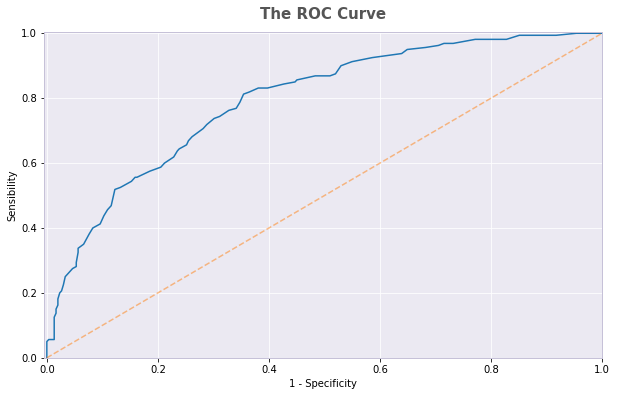

In [12]:
lr2.roc(tests=100)

## Conclusion

Celui-ci permet d'améliorer légèrement le Success Rate et permet d'améliorer nettement la sensibilité (environ 3 points de mieux).